# 4-Layer Neural Network

In [5]:
#import necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets 
from sklearn import preprocessing
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [6]:
data_dir = '/home/shoaib/PSChallenge/'

In [7]:
original_features = pd.read_csv('gr_features_by_object.csv', index_col=False)
new_features = pd.read_csv('new_features.csv', index_col=False)

#combine given + constructed features
features = original_features.merge(new_features, on='name', how='inner')

del original_features
del new_features


In [8]:
#only select Q, QR, QX
features = features[features['type'].isin(['Q', 'QR', 'QX'])]
features

,name,avg_good_det_g,mhps_ratio_g,mhps_low_g,mhps_high_g,mhps_non_zero_g,mhps_PN_flag_g,Amplitude_g,AndersonDarling_g,Autocor_length_g,...,rms_r,amplitude_g,amplitude_r,mag_std_g,mag_std_r,f_var_g,f_var_r,color_index,peak_lag,peak_correlation
40,1WGA J0852.8+1346,107.809917,5.608771,0.050123,0.008937,95.157025,0.057851,0.170973,0.908734,1.000000,...,0.079262,0.555300,0.593622,0.088967,0.079380,0.003206,0.002682,0.322710,2,0.324064
41,1WGA J0924.4+5215,142.242236,1.413863,0.045556,0.033016,133.180124,0.062112,0.336054,0.955665,1.062112,...,0.143579,0.928656,0.945949,0.169360,0.137171,0.002892,0.002197,0.693027,-10,1.420721
43,1WGA J1008.6+5437,285.620253,12.340804,0.030044,0.002423,279.113924,0.050633,0.263707,0.960836,48.518987,...,0.122228,0.727249,0.703695,0.164094,0.132881,0.008371,0.006734,0.166781,-2,8.765996
44,1WGA J1009.4+5334,265.000000,2.574474,0.033157,0.008677,259.708333,0.041667,0.269114,0.974688,2.916667,...,0.105544,0.947264,0.694889,0.130544,0.104393,0.004429,0.001620,0.148905,1,2.515691
46,1WGA J1052.6+5724,307.052117,11.669204,0.008809,0.000760,303.078176,0.000000,0.178939,1.000000,40.026059,...,0.073785,0.522617,0.357922,0.113069,0.075498,0.006004,0.003961,0.290631,0,4.256676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29815,XMDS J02234-0454,147.000000,4.388169,0.102034,0.023252,137.000000,0.000000,0.440969,0.991978,8.000000,...,0.191147,1.192862,1.089590,0.229970,0.196572,0.009095,0.006836,0.060594,4,7.264445
29818,XMS J103020.7+305637,181.462882,14.950431,0.039383,0.014641,175.266376,0.065502,0.210919,0.992764,19.615721,...,0.116825,0.789379,0.503765,0.141610,0.115711,0.006245,0.004957,0.336045,-5,4.238666
29819,XMS J123139.9+641123,359.772028,46.103378,0.026603,0.003096,356.851748,0.000000,0.377165,1.000000,27.539860,...,0.151700,1.161001,1.029041,0.198344,0.162649,0.007592,0.006219,0.281964,0,12.771322
29825,ZC 2357-027,121.658065,14.654263,0.012043,0.002787,114.658065,0.000000,0.158119,0.909754,15.038710,...,0.068501,0.410168,0.315260,0.088219,0.071292,0.004402,0.003630,0.332176,0,1.595052


In [9]:
# drop NaN values
features = features.dropna()
features

,name,avg_good_det_g,mhps_ratio_g,mhps_low_g,mhps_high_g,mhps_non_zero_g,mhps_PN_flag_g,Amplitude_g,AndersonDarling_g,Autocor_length_g,...,rms_r,amplitude_g,amplitude_r,mag_std_g,mag_std_r,f_var_g,f_var_r,color_index,peak_lag,peak_correlation
40,1WGA J0852.8+1346,107.809917,5.608771,0.050123,0.008937,95.157025,0.057851,0.170973,0.908734,1.000000,...,0.079262,0.555300,0.593622,0.088967,0.079380,0.003206,0.002682,0.322710,2,0.324064
41,1WGA J0924.4+5215,142.242236,1.413863,0.045556,0.033016,133.180124,0.062112,0.336054,0.955665,1.062112,...,0.143579,0.928656,0.945949,0.169360,0.137171,0.002892,0.002197,0.693027,-10,1.420721
43,1WGA J1008.6+5437,285.620253,12.340804,0.030044,0.002423,279.113924,0.050633,0.263707,0.960836,48.518987,...,0.122228,0.727249,0.703695,0.164094,0.132881,0.008371,0.006734,0.166781,-2,8.765996
44,1WGA J1009.4+5334,265.000000,2.574474,0.033157,0.008677,259.708333,0.041667,0.269114,0.974688,2.916667,...,0.105544,0.947264,0.694889,0.130544,0.104393,0.004429,0.001620,0.148905,1,2.515691
46,1WGA J1052.6+5724,307.052117,11.669204,0.008809,0.000760,303.078176,0.000000,0.178939,1.000000,40.026059,...,0.073785,0.522617,0.357922,0.113069,0.075498,0.006004,0.003961,0.290631,0,4.256676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29815,XMDS J02234-0454,147.000000,4.388169,0.102034,0.023252,137.000000,0.000000,0.440969,0.991978,8.000000,...,0.191147,1.192862,1.089590,0.229970,0.196572,0.009095,0.006836,0.060594,4,7.264445
29818,XMS J103020.7+305637,181.462882,14.950431,0.039383,0.014641,175.266376,0.065502,0.210919,0.992764,19.615721,...,0.116825,0.789379,0.503765,0.141610,0.115711,0.006245,0.004957,0.336045,-5,4.238666
29819,XMS J123139.9+641123,359.772028,46.103378,0.026603,0.003096,356.851748,0.000000,0.377165,1.000000,27.539860,...,0.151700,1.161001,1.029041,0.198344,0.162649,0.007592,0.006219,0.281964,0,12.771322
29825,ZC 2357-027,121.658065,14.654263,0.012043,0.002787,114.658065,0.000000,0.158119,0.909754,15.038710,...,0.068501,0.410168,0.315260,0.088219,0.071292,0.004402,0.003630,0.332176,0,1.595052


### Substituting `types` with numerical values

In [28]:
type_map = {'Q': 0, 'QR': 1, 'QX': 2}
features['type'] = features['type'].replace(type_map).fillna(0)
#undefined subtype = 0

In [29]:
display(features['type'].value_counts())

type
0    18722
2     2373
1     1224
Name: count, dtype: int64

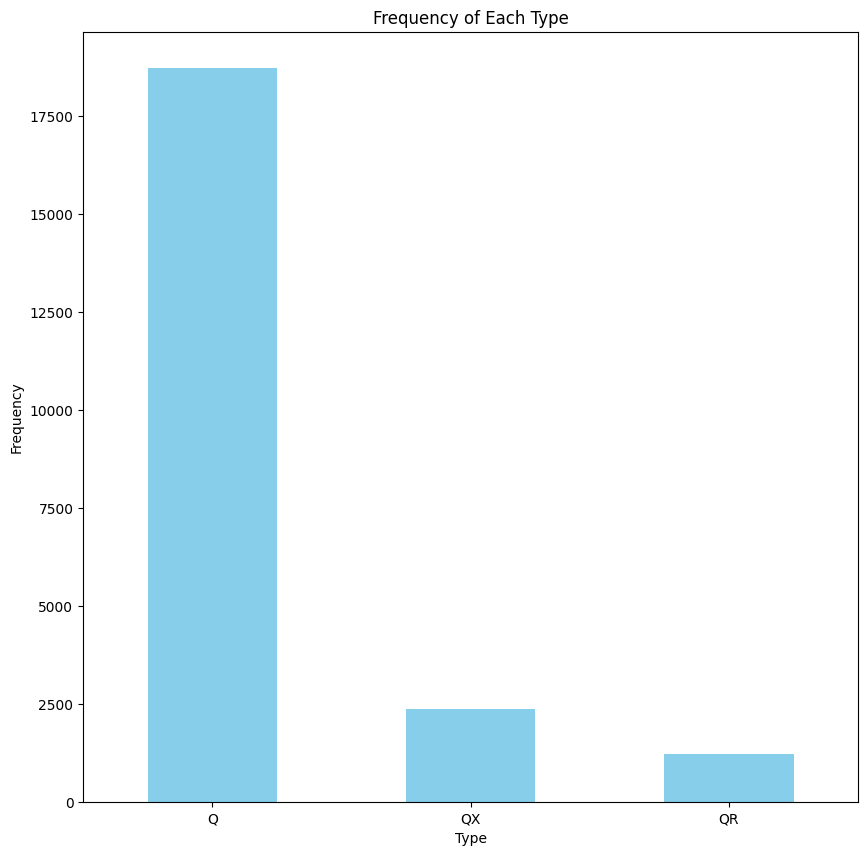

In [33]:
# Calculate the frequency of each value in 'type'
type_counts = features['type'].value_counts()

# Plot a bar chart of the frequencies
plt.figure(figsize=(10, 10))
ax = type_counts.plot.bar(color='skyblue')
ax.set_xticklabels([inv_type_map[label] for label in features['type'].value_counts().index])
plt.title('Frequency of Each Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

#add labels of each type

In [21]:
# Make sure we have only numerical values, so we can feed these into the NN

#drop all object-type columns
features = features.drop(['name'], axis=1)

In [22]:
X = features
# removing the class attribute from X data array
X = X.drop(['type'], axis=1)

# storing labels for later
y = features['type']
display(X.shape, y.shape)
display(X.describe())

(22319, 115)

(22319,)

,avg_good_det_g,mhps_ratio_g,mhps_low_g,mhps_high_g,mhps_non_zero_g,mhps_PN_flag_g,Amplitude_g,AndersonDarling_g,Autocor_length_g,Beyond1Std_g,...,rms_r,amplitude_g,amplitude_r,mag_std_g,mag_std_r,f_var_g,f_var_r,color_index,peak_lag,peak_correlation
count,22319.000000,2.231900e+04,22319.000000,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,...,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,346.688328,3.118277e+09,0.133769,1.635664e-02,340.107871,0.078827,0.291293,0.939765,17.306949,0.299247,...,0.130145,0.989430,0.846642,0.152678,0.128099,0.005573,0.004358,0.213013,-0.218513,5.890042
std,210.183419,3.010970e+11,4.269834,7.800922e-02,212.021555,0.231059,0.111668,0.134006,25.511735,0.041527,...,0.062349,0.362500,0.347545,0.060150,0.055654,0.002740,0.002535,0.196570,4.803819,7.990533
min,45.169492,-1.039744e+09,0.000086,9.685755e-08,23.338983,0.000000,0.033445,0.106588,1.000000,0.025794,...,0.000000,0.108261,0.000000,0.017627,0.015475,0.000190,0.000070,-0.336467,-10.000000,-10.395337
25%,164.000000,4.230616e+00,0.024378,2.382949e-03,157.473936,0.000000,0.209033,0.959065,1.000000,0.273947,...,0.087625,0.730901,0.594802,0.109222,0.087687,0.003731,0.002656,0.086849,-2.000000,1.803103
50%,296.000000,7.895567e+00,0.054153,7.787679e-03,290.000000,0.000000,0.285546,0.994550,5.608696,0.296943,...,0.123787,0.980009,0.829857,0.148687,0.122644,0.005058,0.003862,0.182154,0.000000,3.695965
75%,503.000000,1.782253e+01,0.110455,1.933341e-02,497.000000,0.031478,0.362571,0.999997,23.000000,0.322581,...,0.164191,1.221290,1.065323,0.187639,0.160959,0.006798,0.005442,0.300580,1.000000,7.173524
max,958.293279,4.314939e+13,575.345825,5.236436e+00,953.207739,1.000000,1.893299,1.000000,190.000000,0.542373,...,2.234194,4.497524,6.063714,1.247484,1.005803,0.062233,0.049463,1.998813,10.000000,328.406238


# Using oversampling to fix imbalance

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [17]:
from imblearn.over_sampling import SMOTE

In [25]:
inv_type_map = {v: k for k, v in type_map.items()}  # Inverse mapping

type
2    18722
0    18722
1    18722
Name: count, dtype: int64


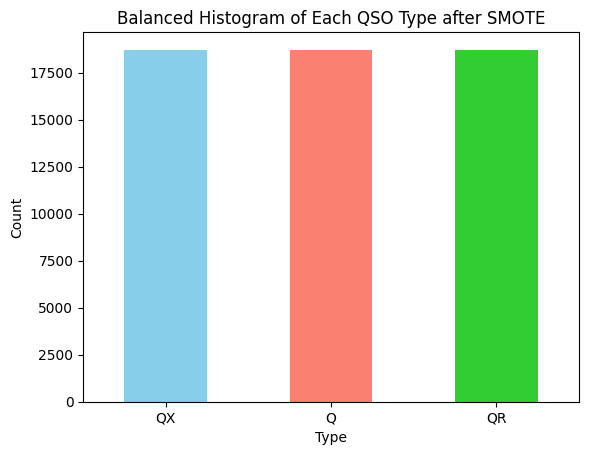

In [26]:
# Separate features and labels
X = features.drop(columns=['type'])
y = features['type']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['type'])

# Combine the resampled features and labels into one balanced DataFrame
balanced_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Display the new class distribution
print(balanced_df['type'].value_counts())

# Plot the new balanced class distribution with numerical values
ax = balanced_df['type'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'limegreen'])

# Update the x-axis labels using the mapping without changing DataFrame values
ax.set_xticklabels([inv_type_map[label] for label in balanced_df['type'].value_counts().index])

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Balanced Histogram of Each QSO Type after SMOTE')
plt.xticks(rotation=0)
plt.show()

In [55]:
X = balanced_df
# removing the class attribute from X data array
X = X.drop(['type'], axis=1)

# storing labels for later
y = balanced_df['type']
display(X.shape, y.shape)
display(X.describe())

(56166, 115)

(56166,)

,avg_good_det_g,mhps_ratio_g,mhps_low_g,mhps_high_g,mhps_non_zero_g,mhps_PN_flag_g,Amplitude_g,AndersonDarling_g,Autocor_length_g,Beyond1Std_g,...,rms_r,amplitude_g,amplitude_r,mag_std_g,mag_std_r,f_var_g,f_var_r,color_index,peak_lag,peak_correlation
count,56166.000000,5.616600e+04,56166.000000,5.616600e+04,56166.000000,56166.000000,56166.000000,56166.000000,56166.000000,56166.000000,...,56166.000000,56166.000000,56166.000000,56166.000000,56166.000000,56166.000000,56166.000000,56166.000000,56166.000000,56166.000000
mean,350.521836,1.246510e+09,0.105414,1.416776e-02,344.140226,0.084694,0.278110,0.946025,19.980995,0.301959,...,0.123325,0.936199,0.790575,0.146876,0.122157,0.005571,0.004385,0.221504,-0.206335,5.979398
std,207.719827,1.898084e+11,2.698256,5.623604e-02,209.420494,0.218750,0.108332,0.115186,25.817286,0.040850,...,0.057445,0.350986,0.331016,0.058521,0.053633,0.002675,0.002466,0.190685,3.973180,7.519512
min,45.169492,-1.039744e+09,0.000086,9.685755e-08,23.338983,0.000000,0.033445,0.106588,1.000000,0.025794,...,0.000000,0.108261,0.000000,0.017627,0.015475,0.000190,0.000070,-0.336467,-10.000000,-10.395337
25%,169.900105,5.119488e+00,0.024135,2.055245e-03,163.757699,0.000000,0.197743,0.958327,1.842135,0.276398,...,0.083175,0.677987,0.544077,0.104597,0.083320,0.003770,0.002717,0.096666,-1.000000,1.876906
50%,301.730539,9.722892e+00,0.051809,6.510901e-03,296.131542,0.003461,0.270499,0.992228,9.891603,0.299145,...,0.116346,0.923199,0.764068,0.142351,0.115784,0.005067,0.003884,0.192770,0.000000,3.805674
75%,503.576004,2.283713e+01,0.102389,1.688556e-02,497.998736,0.040084,0.347388,0.999830,27.916342,0.324957,...,0.154876,1.167692,1.001012,0.181358,0.152855,0.006789,0.005458,0.307509,1.000000,7.275726
max,958.293279,4.314939e+13,575.345825,5.236436e+00,953.207739,1.000000,1.893299,1.000000,190.000000,0.542373,...,2.234194,4.497524,6.063714,1.247484,1.005803,0.062233,0.049463,1.998813,10.000000,328.406238


We are **splitting 80% training and 20% testing**.

In [56]:
## Splitting data to train, test followed by standardization
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

## standardization using StandardScaler applied to X_train (yields mean and sigma for X_train)
## and then standardizing X_train and X_test and X_unlab with mean and sigma obtained from X_train
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

display(X_train.shape, X_test.shape)

(44932, 115)

(11234, 115)

In [57]:
y_train.shape

(44932,)

# Neural Network

Our architecture has 4 layers:

**1. Input Layer**
Purpose:
Accepts the input features from the dataset.
Each row in the dataset corresponds to an object, and the columns are its features.
Details:
- Input Shape: (X_train.shape[1],)
- This is the number of features in the dataset after preprocessing (e.g., X_train).

**2. Hidden Layers**
Purpose:
To learn complex patterns and non-linear relationships between the features and the target classes.
Details:

First Hidden Layer:
- Units: 64 neurons.
- Activation Function: ReLU (Rectified Linear Unit): ReLU introduces non-linearity to the model, allowing it to learn non-linear relationships. Formula: $f(x)=\max(0,x)$
- Fully Connected: Each neuron is connected to all input features.

Second Hidden Layer:
- Units: 64 neurons (same as the first hidden layer).
- Activation Function: ReLU.
- Same purpose as the first layer: to further learn complex patterns and refine the features extracted from the first layer.

**Try: adding or removing Hidden layers**

**3. Output Layer** Purpose: Produces the final predictions for each class (0, 1, 2).
Details:
- Units: 3 (corresponding to the 3 possible classes: 0, 1, 2).
- Activation Function: Softmax: converts the outputs of the neurons into probabilities for each class. Formula: $Softmax(z_i)=\dfrac{e^{z_i}}{\Sigma^K_{j=1}e^{z_j}}$
- $z_i$: Output of neuron $i$
- $K$: Total number of classes (3 in this case)

**4. Model Compilation**
Purpose: Define how the model learns (optimizer) and how its performance is measured (loss function and metrics).
Details:
- Optimizer: Adam
    - Combines the benefits of RMSprop and momentum optimization techniques.
    - Automatically adjusts the learning rate for each parameter.
    - Recommended for most neural networks.
- Loss function: Categorical Cross-Entropy
    - Suitable for multi-class classification when the target is one-hot encoded.
    - Formula: $Loss = -\dfrac{1}{N}\Sigma^N_{i=1}\Sigma^K_{j=1}y_{ij}\log(\hat{y}_{ij})$
    - $N$ = number of samples
    - $K$ = number of classes
    - $y_{ij}$ = true probability (0 or 1)
    - $\hat{y}_{ij}$ = predicted probability
- Metrics: accuracy
    - measures the proportion of correctly classified samples
 
**Training the Model**
Purpose: Adjust the weights of the network using backpropagation and gradient descent to minimize the loss.

Details:
- Epochs = 20 = Number of complete passes through the training dataset.
- Batch size = 32 = Number of samples processed before updating the weights.
- Validation split = 0.2 = 20% of the training data is set aside for validation to monitor the model’s performance during training.

## Running on SMOTE-balanced dataframe

In [58]:
# Define and train the neural network
num_classes = len(y.unique())  # Number of unique classes in y

# Define the neural network model
model = tf.keras.Sequential([
    # Input layer: The number of input features is the number of columns in X
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    
    # Hidden layers with ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    
    # Output layer: Use softmax for multi-class classification (3 classes in 'numtype')
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
#learning rate is 10^-3

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict the classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()  # Convert probabilities to class labels


Epoch 1/20
1124/1124 [==============================] - 7s 5ms/step - loss: 0.9600 - accuracy: 0.5336 - val_loss: 0.8525 - val_accuracy: 0.6126
Epoch 2/20
1124/1124 [==============================] - 6s 5ms/step - loss: 0.7720 - accuracy: 0.6635 - val_loss: 0.7407 - val_accuracy: 0.6783
Epoch 3/20
1124/1124 [==============================] - 6s 5ms/step - loss: 0.6423 - accuracy: 0.7308 - val_loss: 0.6422 - val_accuracy: 0.7291
Epoch 4/20
1124/1124 [==============================] - 6s 5ms/step - loss: 0.5565 - accuracy: 0.7725 - val_loss: 0.5986 - val_accuracy: 0.7519
Epoch 5/20
1124/1124 [==============================] - 6s 5ms/step - loss: 0.4906 - accuracy: 0.8009 - val_loss: 0.5571 - val_accuracy: 0.7697
Epoch 6/20
1124/1124 [==============================] - 6s 6ms/step - loss: 0.4433 - accuracy: 0.8227 - val_loss: 0.5503 - val_accuracy: 0.7758
Epoch 7/20
1124/1124 [==============================] - 6s 5ms/step - loss: 0.4073 - accuracy: 0.8374 - val_loss: 0.5210 - val_accuracy:

In [59]:
from tensorflow.keras.utils import plot_model


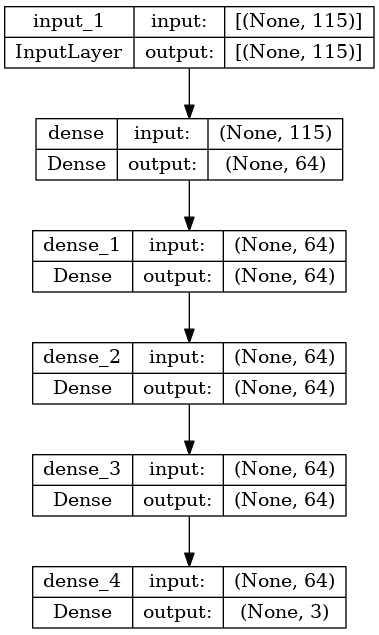

In [40]:

# Save the model architecture to a file
plot_model(model, to_file='4layer_NN_model.png', show_shapes=True, show_layer_names=True)

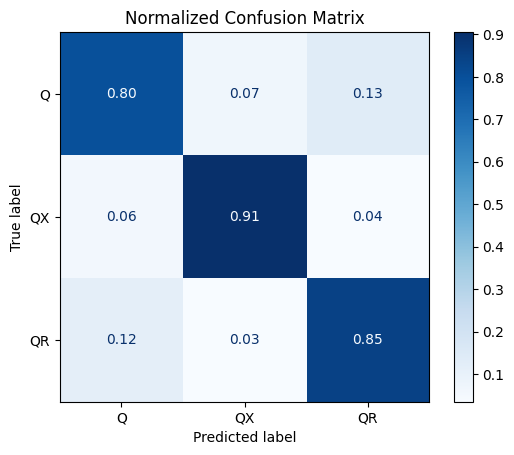

In [60]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize rows to fractions

# Define class labels
str_labels = ['Q', 'QX', 'QR']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=str_labels)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # Corrected line

# Add title and save figure
plt.title("Normalized Confusion Matrix")
plt.savefig("4layer_NN_SMOTE_confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

In [42]:
# Save the model
model.save('4layer_nn_model.keras')  # Use the .keras extension for saving

In [2]:
# Load the model
loaded_model = tf.keras.models.load_model('nn_model.keras')

2024-12-05 15:45:04.985810: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
display(loaded_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,299 (235.55 KB)

 Trainable params: 20,099 (78.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,200 (157.04 KB)

None

## Running NN on imbalanced dataset

In [46]:
X = features
# removing the class attribute from X data array
X = X.drop(['type'], axis=1)

# storing labels for later
y = features['type']
display(X.shape, y.shape)
display(X.describe())

(22319, 115)

(22319,)

,avg_good_det_g,mhps_ratio_g,mhps_low_g,mhps_high_g,mhps_non_zero_g,mhps_PN_flag_g,Amplitude_g,AndersonDarling_g,Autocor_length_g,Beyond1Std_g,...,rms_r,amplitude_g,amplitude_r,mag_std_g,mag_std_r,f_var_g,f_var_r,color_index,peak_lag,peak_correlation
count,22319.000000,2.231900e+04,22319.000000,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,...,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,346.688328,3.118277e+09,0.133769,1.635664e-02,340.107871,0.078827,0.291293,0.939765,17.306949,0.299247,...,0.130145,0.989430,0.846642,0.152678,0.128099,0.005573,0.004358,0.213013,-0.218513,5.890042
std,210.183419,3.010970e+11,4.269834,7.800922e-02,212.021555,0.231059,0.111668,0.134006,25.511735,0.041527,...,0.062349,0.362500,0.347545,0.060150,0.055654,0.002740,0.002535,0.196570,4.803819,7.990533
min,45.169492,-1.039744e+09,0.000086,9.685755e-08,23.338983,0.000000,0.033445,0.106588,1.000000,0.025794,...,0.000000,0.108261,0.000000,0.017627,0.015475,0.000190,0.000070,-0.336467,-10.000000,-10.395337
25%,164.000000,4.230616e+00,0.024378,2.382949e-03,157.473936,0.000000,0.209033,0.959065,1.000000,0.273947,...,0.087625,0.730901,0.594802,0.109222,0.087687,0.003731,0.002656,0.086849,-2.000000,1.803103
50%,296.000000,7.895567e+00,0.054153,7.787679e-03,290.000000,0.000000,0.285546,0.994550,5.608696,0.296943,...,0.123787,0.980009,0.829857,0.148687,0.122644,0.005058,0.003862,0.182154,0.000000,3.695965
75%,503.000000,1.782253e+01,0.110455,1.933341e-02,497.000000,0.031478,0.362571,0.999997,23.000000,0.322581,...,0.164191,1.221290,1.065323,0.187639,0.160959,0.006798,0.005442,0.300580,1.000000,7.173524
max,958.293279,4.314939e+13,575.345825,5.236436e+00,953.207739,1.000000,1.893299,1.000000,190.000000,0.542373,...,2.234194,4.497524,6.063714,1.247484,1.005803,0.062233,0.049463,1.998813,10.000000,328.406238


In [47]:
## Splitting data to train, test followed by standardization
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

## standardization using StandardScaler applied to X_train (yields mean and sigma for X_train)
## and then standardizing X_train and X_test and X_unlab with mean and sigma obtained from X_train
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

display(X_train.shape, X_test.shape)

(17855, 115)

(4464, 115)

In [45]:
y_train.shape

(44932,)

In [48]:
# Define and train the neural network
num_classes = len(y.unique())  # Number of unique classes in y

# Define the neural network model
model = tf.keras.Sequential([
    # Input layer: The number of input features is the number of columns in X
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    
    # Hidden layers with ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    
    # Output layer: Use softmax for multi-class classification (3 classes in 'numtype')
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
#learning rate is 10^-3

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict the classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()  # Convert probabilities to class labels

Epoch 1/20
447/447 [==============================] - 10s 18ms/step - loss: 0.5504 - accuracy: 0.8400 - val_loss: 0.5614 - val_accuracy: 0.8261
Epoch 2/20
447/447 [==============================] - 7s 17ms/step - loss: 0.5079 - accuracy: 0.8437 - val_loss: 0.5591 - val_accuracy: 0.8264
Epoch 3/20
447/447 [==============================] - 7s 16ms/step - loss: 0.4947 - accuracy: 0.8448 - val_loss: 0.5678 - val_accuracy: 0.8253
Epoch 4/20
447/447 [==============================] - 7s 16ms/step - loss: 0.4842 - accuracy: 0.8455 - val_loss: 0.5592 - val_accuracy: 0.8286
Epoch 5/20
447/447 [==============================] - 7s 16ms/step - loss: 0.4726 - accuracy: 0.8486 - val_loss: 0.5667 - val_accuracy: 0.8281
Epoch 6/20
447/447 [==============================] - 7s 16ms/step - loss: 0.4596 - accuracy: 0.8492 - val_loss: 0.5909 - val_accuracy: 0.8258
Epoch 7/20
447/447 [==============================] - 7s 15ms/step - loss: 0.4493 - accuracy: 0.8511 - val_loss: 0.5901 - val_accuracy: 0.825

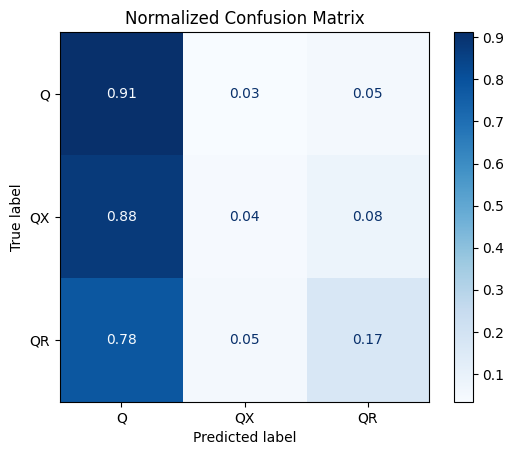

In [49]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize rows to fractions

# Define class labels
str_labels = ['Q', 'QX', 'QR']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=str_labels)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # Corrected line

# Add title and save figure
plt.title("Normalized Confusion Matrix")
plt.savefig("4layer_NN_confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

## Increasing the no. of training epochs

In [50]:
# Define and train the neural network
num_classes = len(y.unique())  # Number of unique classes in y

# Define the neural network model
model = tf.keras.Sequential([
    # Input layer: The number of input features is the number of columns in X
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    
    # Hidden layers with ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    
    # Output layer: Use softmax for multi-class classification (3 classes in 'numtype')
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
#learning rate is 10^-3

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict the classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()  # Convert probabilities to class labels

Epoch 1/50
447/447 [==============================] - 4s 6ms/step - loss: 0.5536 - accuracy: 0.8379 - val_loss: 0.5579 - val_accuracy: 0.8267
Epoch 2/50
447/447 [==============================] - 2s 6ms/step - loss: 0.5054 - accuracy: 0.8444 - val_loss: 0.5568 - val_accuracy: 0.8281
Epoch 3/50
447/447 [==============================] - 3s 6ms/step - loss: 0.4930 - accuracy: 0.8456 - val_loss: 0.5511 - val_accuracy: 0.8250
Epoch 4/50
447/447 [==============================] - 2s 5ms/step - loss: 0.4819 - accuracy: 0.8461 - val_loss: 0.5626 - val_accuracy: 0.8269
Epoch 5/50
447/447 [==============================] - 2s 5ms/step - loss: 0.4720 - accuracy: 0.8477 - val_loss: 0.5570 - val_accuracy: 0.8261
Epoch 6/50
447/447 [==============================] - 3s 6ms/step - loss: 0.4593 - accuracy: 0.8501 - val_loss: 0.6041 - val_accuracy: 0.8272
Epoch 7/50
447/447 [==============================] - 2s 5ms/step - loss: 0.4499 - accuracy: 0.8515 - val_loss: 0.5692 - val_accuracy: 0.8267
Epoch 

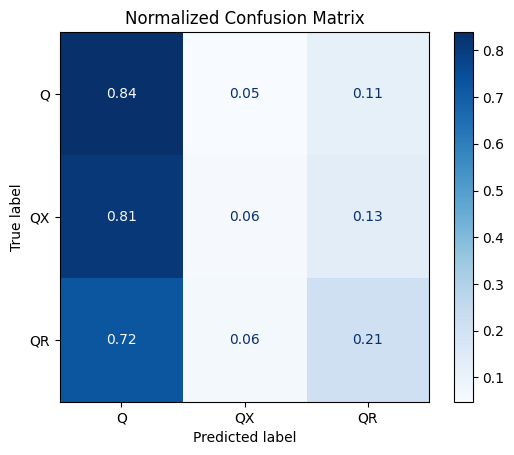

In [51]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize rows to fractions

# Define class labels
str_labels = ['Q', 'QX', 'QR']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=str_labels)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # Corrected line

# Add title and save figure
plt.title("Normalized Confusion Matrix")
plt.savefig("4layer_NN_confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

With 50 training epochs instead of 20, the NN gives slightly better results.

# New Architecture/Algorithm w/Dropout layers and K-fold Stratification

1. We use `StratifiedKFold` to:
* Split the dataset into 5 folds with balanced class distributions.
* Iteration 1–5: Each fold is used as a test set once while the remaining 4 folds form the training set.
* Result: The model is trained and tested 5 times, each time on different data.
* We use a loop to evaluate model performance more reliably by training and testing on different data splits.
Reduces variance in performance estimates.

2. Using `StandardScaler()`, we perform data standardization
* Standardizes features to have a mean of 0 and standard deviation of 1.
* Prevents features with larger scales from dominating learning.

## The New Neural Network Model w/Dropout Layers
Our architecture consists of:
1. Input Layer: Matches the number of features in X_train.
2. Dense Layers: 3 hidden layers with 64 neurons each, using ReLU activation.
3. Dropout Layers: Randomly drops 30% of neurons during training to prevent overfitting.
4. Output Layer: Softmax activation for multi-class classification.
* Optimizer: adam for efficient training.
* Loss Function: sparse_categorical_crossentropy for multi-class classification.
* Metric: Tracks accuracy during training.

We **compute class weights** to handle the class imbalance:
* Computes class weights to give more importance to underrepresented classes.
* Helps the model avoid bias towards majority classes.

And also **implement early stopping** to avoid overfitting and save training time:
* Stops training early if validation loss doesn't improve for 5 epochs.
* Prevents overfitting and saves training time.

We devide the data for training as follows:
* Trains the model on X_train and y_train.
* Uses 20% of training data for validation.
* Applies class weights and early stopping.
* Runs up to 50 epochs unless early stopping triggers.

**We can experiment with: changing the learning rate, running for a larger amount of epochs**

In [53]:
#import necessary packages
from sklearn.model_selection import StratifiedKFold  # Correct import

Epoch 1/50
447/447 [==============================] - 4s 7ms/step - loss: 1.1596 - accuracy: 0.3164 - val_loss: 1.1362 - val_accuracy: 0.2848
Epoch 2/50
447/447 [==============================] - 3s 6ms/step - loss: 1.1107 - accuracy: 0.3549 - val_loss: 1.0935 - val_accuracy: 0.3220
Epoch 3/50
447/447 [==============================] - 2s 5ms/step - loss: 1.1004 - accuracy: 0.4015 - val_loss: 1.1250 - val_accuracy: 0.3610
Epoch 4/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0833 - accuracy: 0.4177 - val_loss: 1.0347 - val_accuracy: 0.4971
Epoch 5/50
447/447 [==============================] - 3s 7ms/step - loss: 1.0762 - accuracy: 0.4235 - val_loss: 1.0606 - val_accuracy: 0.5057
Epoch 6/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0703 - accuracy: 0.4519 - val_loss: 1.0146 - val_accuracy: 0.4948
Epoch 7/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0677 - accuracy: 0.4575 - val_loss: 1.0556 - val_accuracy: 0.4929
Epoch 

<Figure size 800x600 with 0 Axes>

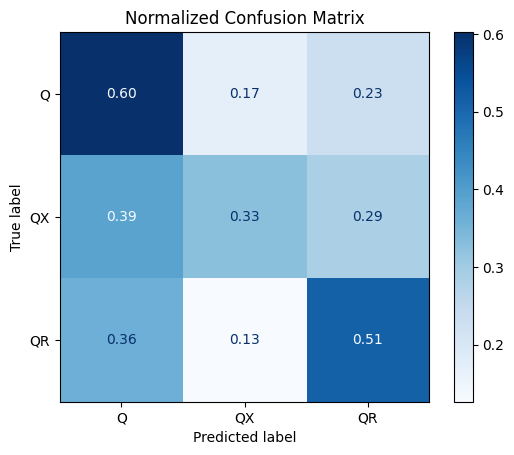

Epoch 1/50
447/447 [==============================] - 4s 6ms/step - loss: 1.1400 - accuracy: 0.3320 - val_loss: 1.0833 - val_accuracy: 0.4116
Epoch 2/50
447/447 [==============================] - 3s 7ms/step - loss: 1.0940 - accuracy: 0.4056 - val_loss: 1.0730 - val_accuracy: 0.4646
Epoch 3/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0836 - accuracy: 0.4287 - val_loss: 1.0298 - val_accuracy: 0.5015
Epoch 4/50
447/447 [==============================] - 2s 6ms/step - loss: 1.0715 - accuracy: 0.4509 - val_loss: 1.0523 - val_accuracy: 0.4825
Epoch 5/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0629 - accuracy: 0.4411 - val_loss: 0.9682 - val_accuracy: 0.5556
Epoch 6/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0517 - accuracy: 0.4294 - val_loss: 0.9671 - val_accuracy: 0.5746
Epoch 7/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0399 - accuracy: 0.4465 - val_loss: 1.0052 - val_accuracy: 0.4920
Epoch 

<Figure size 800x600 with 0 Axes>

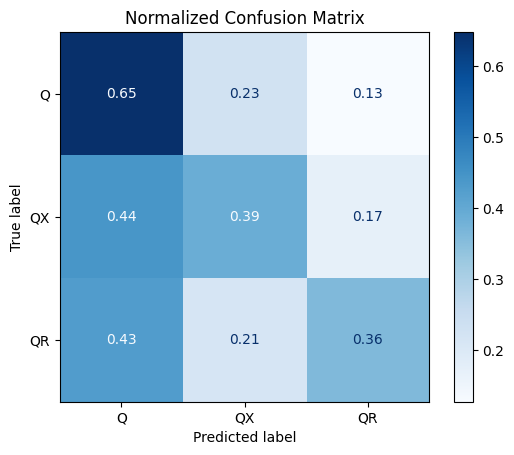

Epoch 1/50
447/447 [==============================] - 4s 7ms/step - loss: 1.1385 - accuracy: 0.3841 - val_loss: 1.0755 - val_accuracy: 0.4968
Epoch 2/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0939 - accuracy: 0.4411 - val_loss: 1.1365 - val_accuracy: 0.3570
Epoch 3/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0868 - accuracy: 0.4418 - val_loss: 1.1398 - val_accuracy: 0.3593
Epoch 4/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0770 - accuracy: 0.4498 - val_loss: 1.0244 - val_accuracy: 0.5223
Epoch 5/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0652 - accuracy: 0.4826 - val_loss: 1.0302 - val_accuracy: 0.4537
Epoch 6/50
447/447 [==============================] - 3s 7ms/step - loss: 1.0614 - accuracy: 0.4593 - val_loss: 1.0509 - val_accuracy: 0.4489
Epoch 7/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0502 - accuracy: 0.4546 - val_loss: 1.0575 - val_accuracy: 0.4985
Epoch 

<Figure size 800x600 with 0 Axes>

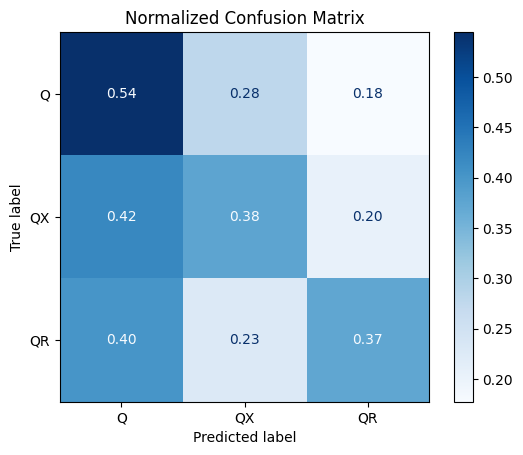

Epoch 1/50
447/447 [==============================] - 5s 8ms/step - loss: 1.1303 - accuracy: 0.3713 - val_loss: 1.1508 - val_accuracy: 0.3884
Epoch 2/50
447/447 [==============================] - 5s 10ms/step - loss: 1.1095 - accuracy: 0.4212 - val_loss: 1.0568 - val_accuracy: 0.4324
Epoch 3/50
447/447 [==============================] - 4s 8ms/step - loss: 1.0879 - accuracy: 0.4194 - val_loss: 1.0132 - val_accuracy: 0.5444
Epoch 4/50
447/447 [==============================] - 3s 7ms/step - loss: 1.0871 - accuracy: 0.4541 - val_loss: 1.0194 - val_accuracy: 0.5388
Epoch 5/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0694 - accuracy: 0.4581 - val_loss: 1.0321 - val_accuracy: 0.4898
Epoch 6/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0567 - accuracy: 0.4482 - val_loss: 1.0534 - val_accuracy: 0.4772
Epoch 7/50
447/447 [==============================] - 3s 7ms/step - loss: 1.0535 - accuracy: 0.4656 - val_loss: 0.9962 - val_accuracy: 0.5469
Epoch

<Figure size 800x600 with 0 Axes>

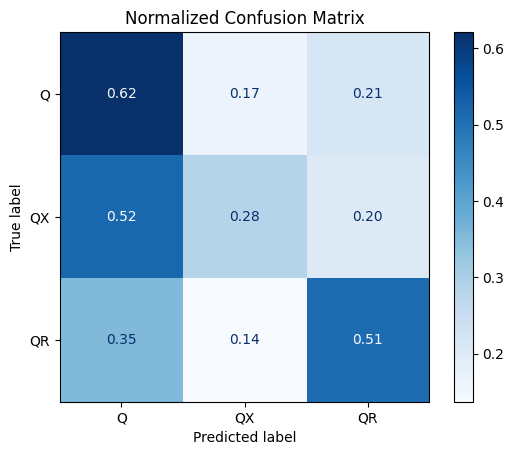

Epoch 1/50
447/447 [==============================] - 4s 7ms/step - loss: 1.1403 - accuracy: 0.3582 - val_loss: 1.1075 - val_accuracy: 0.4177
Epoch 2/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0888 - accuracy: 0.4250 - val_loss: 1.0418 - val_accuracy: 0.4812
Epoch 3/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0852 - accuracy: 0.4322 - val_loss: 1.0445 - val_accuracy: 0.4619
Epoch 4/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0803 - accuracy: 0.4505 - val_loss: 1.0875 - val_accuracy: 0.4429
Epoch 5/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0665 - accuracy: 0.4500 - val_loss: 1.0497 - val_accuracy: 0.4661
Epoch 6/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0580 - accuracy: 0.4459 - val_loss: 0.9774 - val_accuracy: 0.5675
Epoch 7/50
447/447 [==============================] - 3s 6ms/step - loss: 1.0601 - accuracy: 0.4532 - val_loss: 0.9806 - val_accuracy: 0.5546
Epoch 

<Figure size 800x600 with 0 Axes>

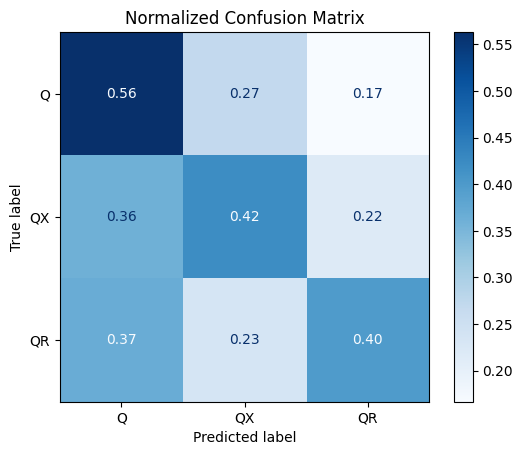

In [54]:
# Stratified K-Fold Split
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the improved neural network model
    num_classes = len(np.unique(y))

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),  # Dropout to prevent overfitting
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compute class weights to handle imbalance
    class_weights = dict(enumerate(
        len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train))
    ))

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

    # Add EarlyStopping
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, 
                        epochs=50, 
                        batch_size=32, 
                        validation_split=0.2, 
                        class_weight=class_weights,
                        callbacks=[early_stop])

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.2f}")

    # Predict and plot confusion matrix
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_test, y_pred_classes)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    str_labels = ['Q', 'QX', 'QR']

    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=str_labels).plot(cmap=plt.cm.Blues, values_format=".2f")
    plt.title("Normalized Confusion Matrix")
    plt.savefig("NN_dropout_kfold_confusion_matrix.png", dpi=300, bbox_inches="tight")
    plt.show()
